In [1]:
import MDAnalysis as mda
import qvalue
from qvalue.data.files import DCD, PDB, REF

In [2]:
import qvalue.qvalue
universe = mda.Universe(PDB,DCD)
reference_universe = mda.Universe(REF)
qvalues = qvalue.qValue(universe, reference_universe)
qvalues.add_method('Wolynes', method_name='Selection',selection = 'resid 1 to 2', complementary_selection='resid 10 to 12')
qvalues.add_method('Wolynes', method_name='Local', store_per_residue=True, store_per_contact=True)
qvalues.run()
qvalues.results.keys()

/home/cb/miniconda3/envs/mda_workshop/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


dict_keys(['Wolynes', 'Onuchic', 'Selection', 'Local'])

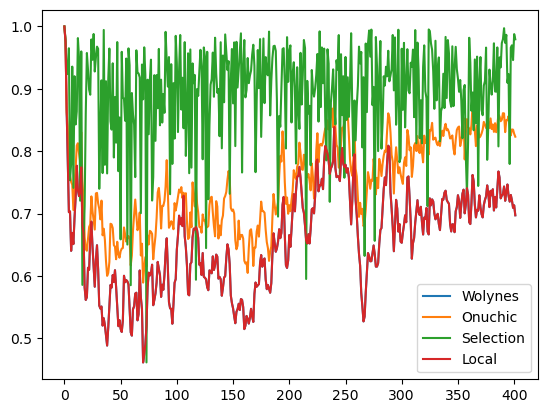

<Axes: >

In [3]:
qvalues.plot()

Text(50.722222222222214, 0.5, 'Frame')

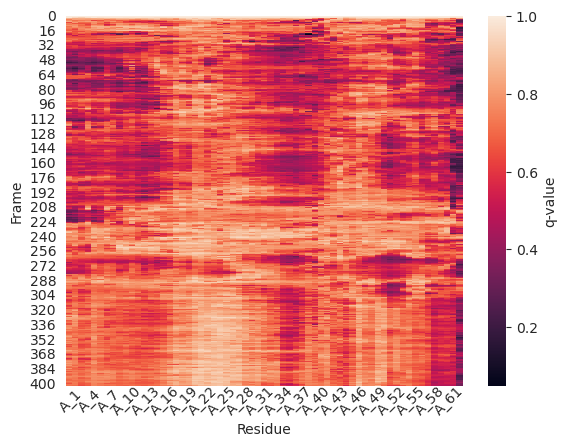

In [4]:
#Plot the q-values per residue

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
ax = sns.heatmap(qvalues.results['Local']['q_per_residue'], cbar_kws={'label': 'q-value'})
ticks = np.arange(0, len(qvalues.results['Local']['chain_res']), 3)
ax.set_xticks(ticks)
ax.set_xticklabels(np.array(qvalues.results['Local']['chain_res'])[ticks], rotation=45, ha="center", rotation_mode="anchor")
plt.xlabel('Residue')
plt.ylabel('Frame')



<Axes: >

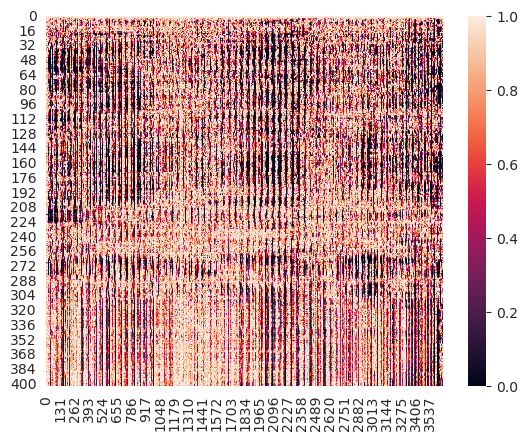

In [5]:
#Plot the q-values per contact
sns.heatmap(qvalues.results['Local']['q_per_contact'])
